# K Nearest Neighbour Classifier
Name: Sebastian Firsaev 

Student ID: C00263348

Semester: two - 2024

Guide Notebook used: https://notebook.community/RagsX137/TF_Tutorial/My+own+KNN+Classifier

## Notebook Description

This Jupyter notebook is structured to guide that develops a custom machine learning model based on the K Nearest Neighbour Classifier, and thoroughly evaluates this model's performance. The iterative process of tuning the model's hyperparameter (k value) and the detailed evaluation using accuracy and a classification reports demonstrate a methodical approach to improving and understanding model performance. This notebook shows how to apply the K-Nearest Neighbours algorithm to a real-world classification problem, providing a solid foundation for further exploration and refinement in predictive modeling tasks.

### 1. Business Understanding

Here, the goal is to develop a predictive model to classify wines based on quality using various chemical properties. This could help winemakers improve wine quality or assist consumers and retailers in selecting higher-quality wines.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from scipy.spatial import distance

In [3]:
wine_data = pd.read_csv('WineQT.csv')

### 2. Data Understanding

The data understanding phase involves collecting initial data and then proceeding with activities to get familiar with the data, identify data quality issues, and discover first insights into the data. Initial Data Collection: Loading the wine quality dataset using pandas. Data Exploration: Utilizing functions like head(), describe(), and isnull().sum() to explore the dataset's structure, summary statistics, and check for missing values. Visualization: Using seaborn for pair plots and a heatmap to visualize distributions of features, correlations between them, and their relationship with the wine quality (Quality variable). This helps in understanding the data's characteristics and potential relationships.

In [4]:
print(wine_data.describe())
print(wine_data.isnull().sum())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

In [7]:
wine_data.drop('Id', axis=1, inplace=True)


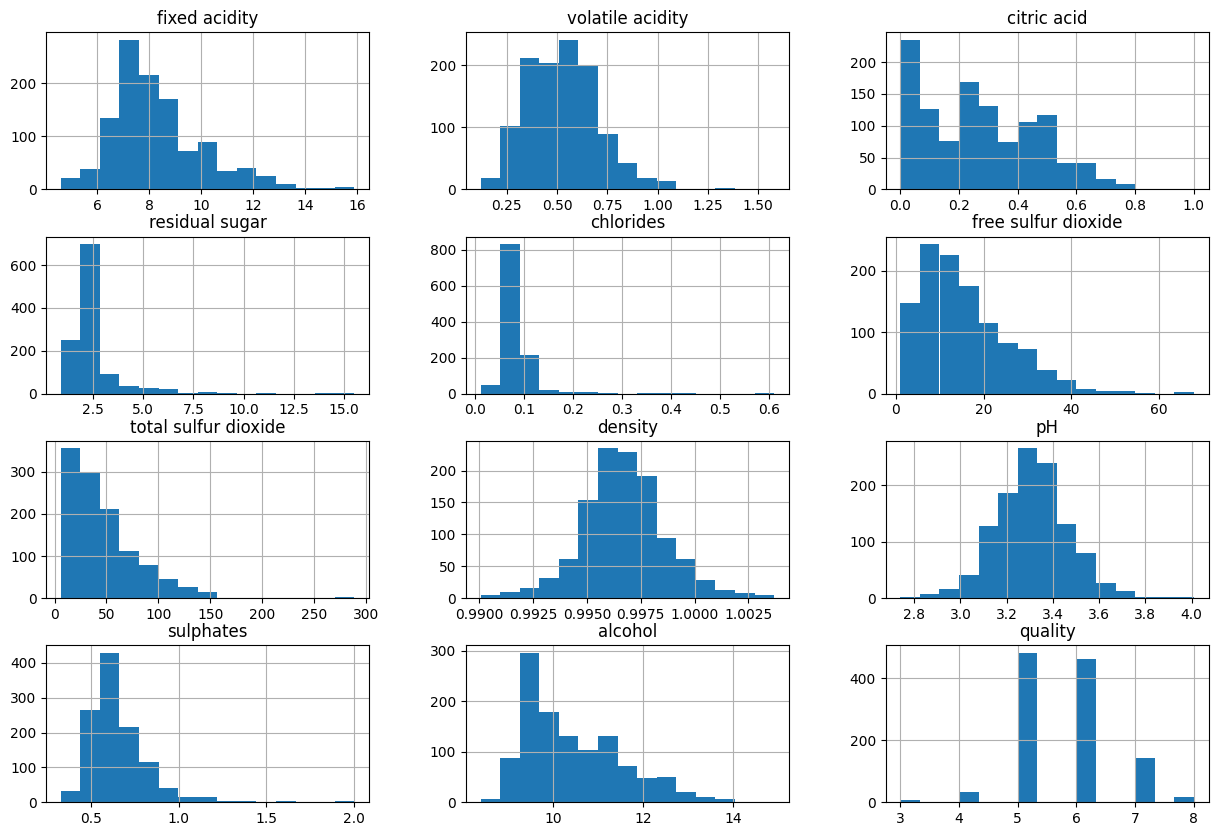

In [8]:
wine_data.hist(bins=15, figsize=(15, 10))
plt.show()

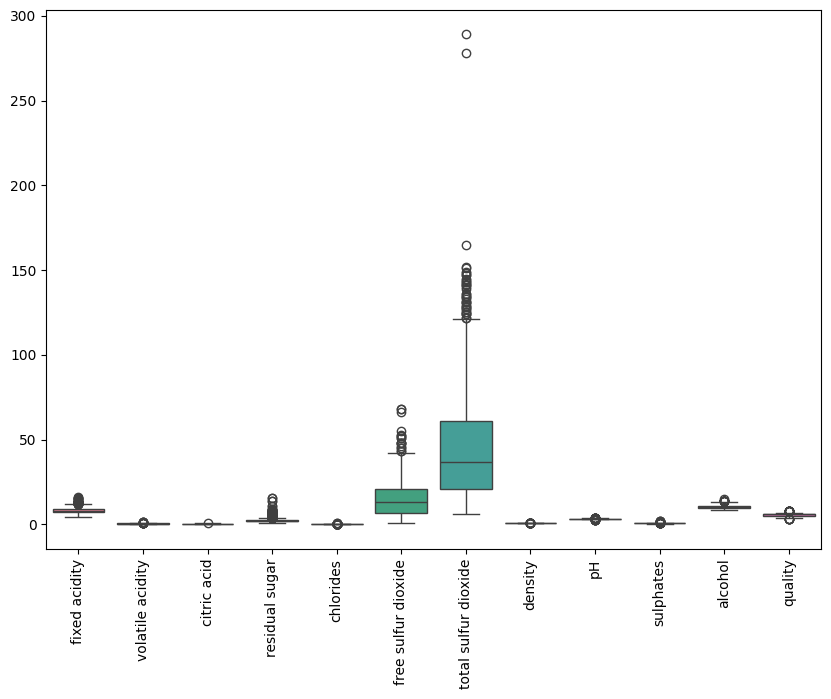

In [9]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=wine_data)
plt.xticks(rotation=90)
plt.show()

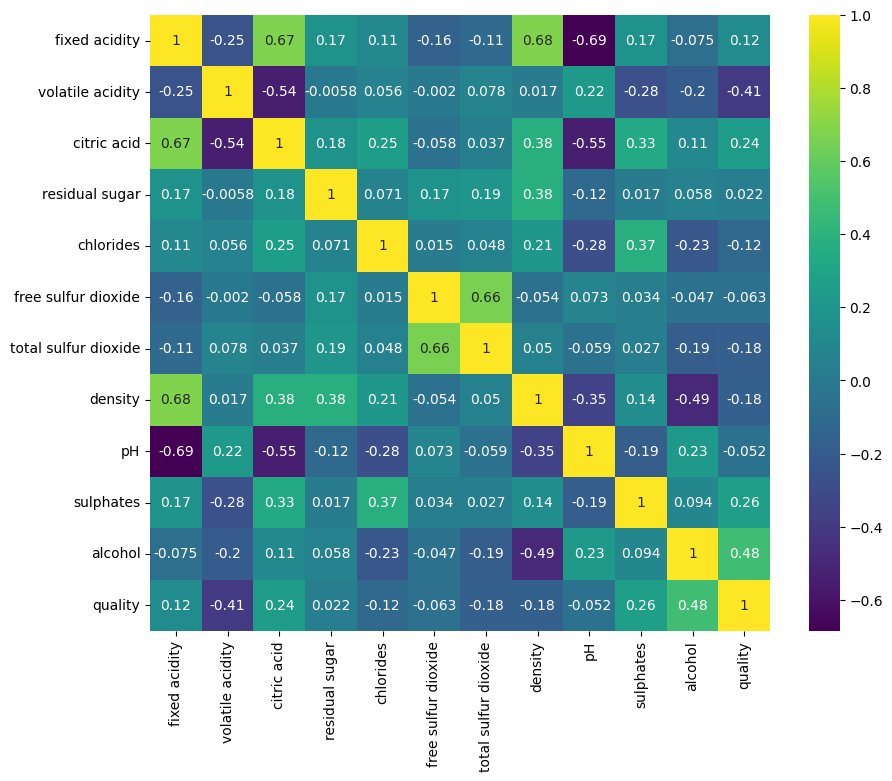

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(wine_data.corr(), annot=True, cmap='viridis')
plt.show()

### 3. Data Preparation

This phase includes all activities to construct the final dataset from the initial raw data. Standardizing the features with StandardScaler to ensure that all features contribute equally to the distance computation in KNN. Using train_test_split to divide the dataset into training and testing sets to prepare for model training and evaluation.

In [11]:

X = wine_data.drop('quality', axis=1)
y = wine_data['quality']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

### 4. Modeling
A custom KNN classifier is defined with methods for fitting to the training data (fit) and predicting the quality of wine samples (predict). The KNN algorithm relies on distance computations (Euclidean distance) to find the nearest neighbours and decide on the class (quality) based on the majority vote among the k nearest neighbours.

In [12]:
class KNearestNeighbours:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y.reset_index(drop=True)  
        return self

    def predict(self, X):
        predictions = []
        for x in X:
            # Calculate Euclidean distance from x to all points in X_train
            distances = [distance.euclidean(x, x_train) for x_train in self.X_train]
            # Sort distances and get indices of k nearest neighbours
            k_indices = np.argsort(distances)[:self.k]
            # Get the labels of the k nearest neighbours
            k_nearest_labels = [self.y_train.iloc[i] for i in k_indices]
            # Determine the most frequent label (mode) among the k nearest neighbours
            prediction = max(set(k_nearest_labels), key=k_nearest_labels.count)
            predictions.append(prediction)
        return predictions


In [13]:
knn = KNearestNeighbours(k=3) 
knn.fit(X_train, y_train)

In [14]:

from sklearn.metrics import accuracy_score
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNearestNeighbours(k=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    accuracies.append(accuracy)

### 5. Evaluation

The results from the K-Nearest Neighbours classifier with the best k value of 17 on the wine quality dataset provide several insights into the model's performance and the characteristics of the dataset. The final accuracy of approximately 57.6% indicates that the model correctly predicts the wine quality rating about 58% of the time. This level of accuracy suggests that while the model has learned some patterns from the data, there's significant room for improvement. Given the complexity and potential subtleties in wine quality determination, this result isn't unexpected, especially with a simple model like KNN.

The classification report shows varying performance across different quality ratings, likely reflecting class imbalances in the dataset. Classes with more samples (e.g., quality ratings 5 and 6) have higher precision and recall, indicating the model's better performance on more frequently occurring classes. The model performs best on wines with quality ratings of 5 and 6, which have the highest precision and recall scores among all classes. This suggests that the model is more capable of identifying and correctly predicting wines within these two quality categories, likely due to these classes having more data points than others. The model fails to correctly predict any samples for the extreme quality ratings (3, 4, and 8), as indicated by 0.00 scores for precision and recall. This is a common issue in datasets with significant class imbalances, where minority classes are underrepresented and thus harder for the model to learn. For wines rated as quality 7, the model shows modest performance with a precision of 0.47 and a recall of 0.28. This indicates that while the model can identify some of these wines correctly, it struggles to consistently do so.

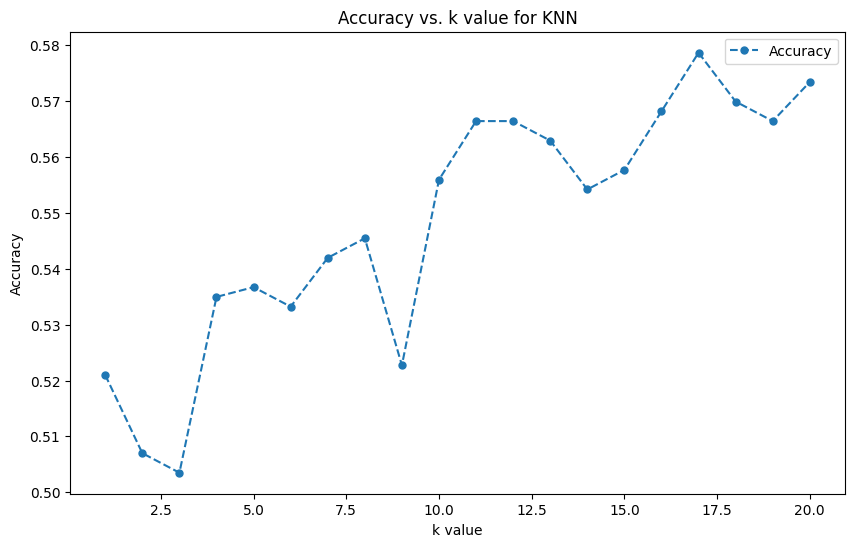

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed', markersize=5, label='Accuracy')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k value for KNN')
plt.legend()
plt.show()

In [16]:
# Choose the best k and evaluate
best_k = accuracies.index(max(accuracies)) + 1
print(f"Best k value: {best_k}")

knn = KNearestNeighbours(k=best_k)
knn.fit(X_train, y_train)
final_predictions = knn.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)
print(f"Final Accuracy with k={best_k}: {final_accuracy}")

Best k value: 17
Final Accuracy with k=17: 0.5786713286713286


In [17]:
# Classification report
print(classification_report(y_test, final_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        18
           5       0.60      0.77      0.68       235
           6       0.56      0.55      0.56       240
           7       0.50      0.23      0.32        69
           8       0.00      0.00      0.00         7

    accuracy                           0.58       572
   macro avg       0.28      0.26      0.26       572
weighted avg       0.54      0.58      0.55       572



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
